In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
path = "/content/drive/MyDrive/TESLA/HistoricalData_1726367135218.csv"
df = pd.read_csv(path)

# Show basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB
None
         Date Close/Last    Volume     Open     High        Low
0  09/13/2024    $230.29  59515110  $228.00  $232.67    $226.32
1  09/12/2024    $229.81  72020040  $224.66  $231.45    $223.83
2  09/11/2024    $228.13  83548630  $224.55  $228.47  $216.8003
3  09/10/2024    $226.17  78891140  $220.07  $226.40  $218.6377
4  09/09/2024    $216.27  67443520  $216.20  $219.87    $213.67


In [ ]:
for col in ['Close/Last', 'Open', 'High', 'Low']:
    df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

df['Volume'] = df['Volume'].astype(str).str.replace(',', '', regex=False).astype(float)

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')
df = df.dropna(subset=['Close/Last', 'Date'])
df = df.reset_index(drop=True)

In [ ]:
df.rename(columns={
    'Close/Last': 'Close',
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Volume': 'Volume'
}, inplace=True)

In [ ]:
print(df[['Date', 'Close']].head())
print(df[['Date', 'Close']].tail())
print(df[['Date', 'Close']].dtypes)
print(df.shape)

        Date    Close
0 2014-09-15  16.9240
1 2014-09-16  17.3827
2 2014-09-17  17.4253
3 2014-09-18  17.5880
4 2014-09-19  17.2880
           Date   Close
2512 2024-09-09  216.27
2513 2024-09-10  226.17
2514 2024-09-11  228.13
2515 2024-09-12  229.81
2516 2024-09-13  230.29
Date     datetime64[ns]
Close           float64
dtype: object
(2517, 6)


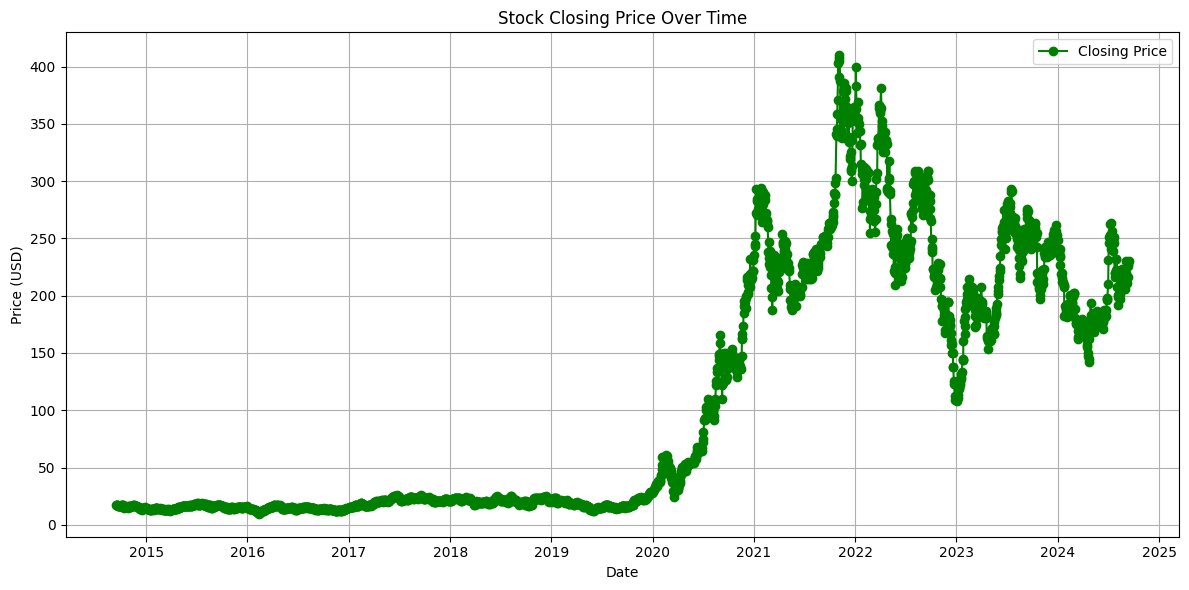

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='green', marker='o')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

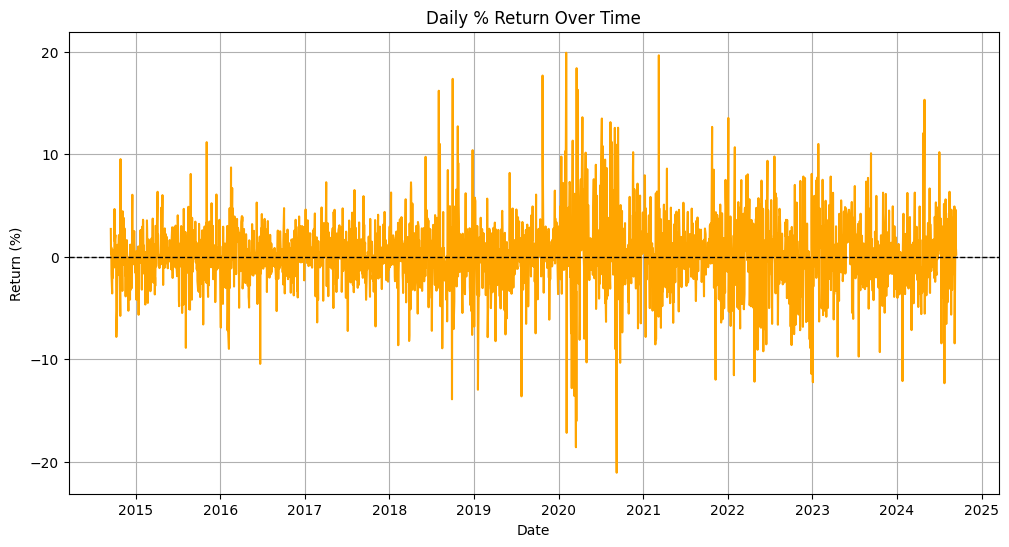

In [ ]:
df['Daily Return (%)'] = df['Close'].pct_change() * 100

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Daily Return (%)'], color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Daily % Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

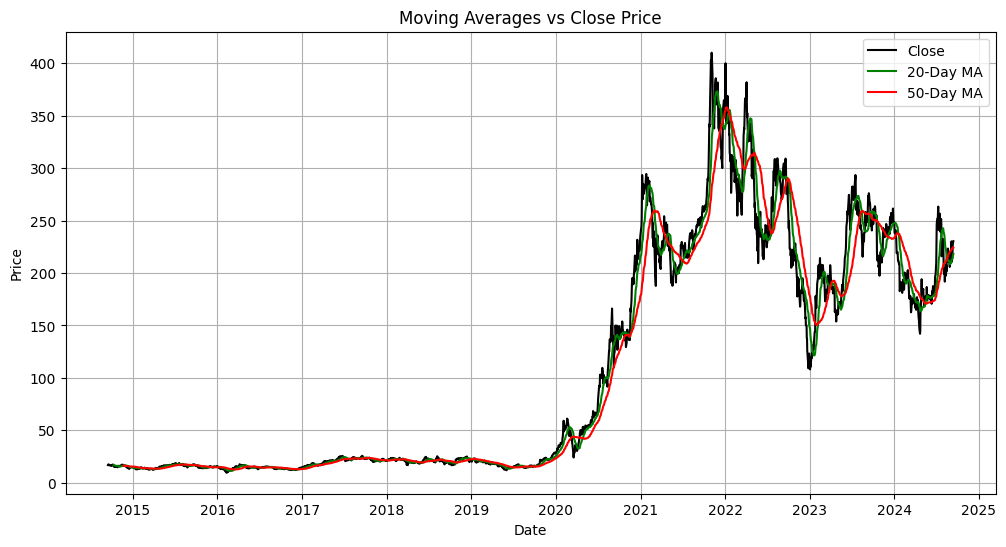

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close', color='black')
plt.plot(df['Date'], df['MA20'], label='20-Day MA', color='green')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('Moving Averages vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'],'Signal'] = 1 #buy
df.loc[df['MA20'] < df['MA50'],'Signal'] = -1 #sell

In [ ]:
df["Position"] = df['Signal'].diff()

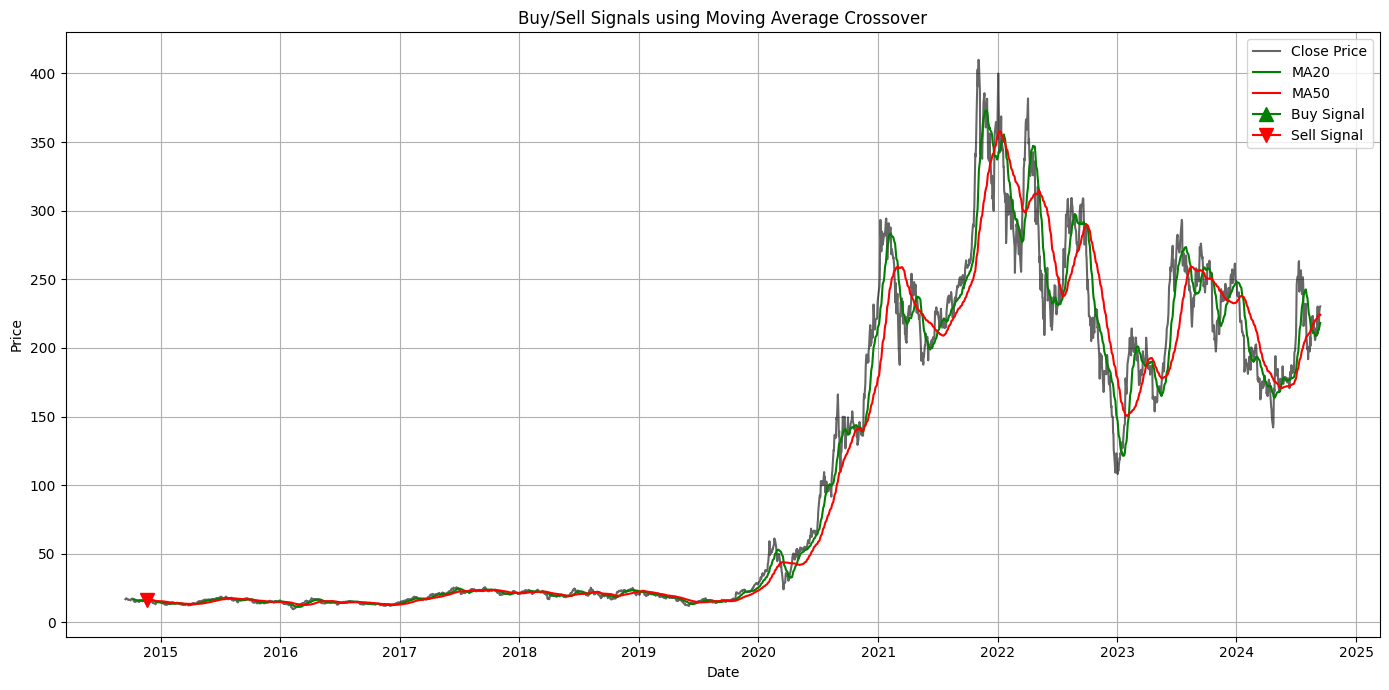

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(df['Date'], df['MA20'], label='MA20', color='green')
plt.plot(df['Date'], df['MA50'], label='MA50', color='red')

# Buy signals
plt.plot(df[df['Position'] == 1]['Date'], df[df['Position'] == 1]['Close'],
         marker='^', color='green', markersize=10, label='Buy Signal')

# Sell signals
plt.plot(df[df['Position'] == -1]['Date'], df[df['Position'] == -1]['Close'],
         marker='v', color='red', markersize=10, label='Sell Signal')

plt.title('Buy/Sell Signals using Moving Average Crossover')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna()

In [ ]:
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Volume_Change'] = df['Volume'].pct_change()

df = df.dropna()

features = ['Close', 'MA5', 'MA10', 'Volume', 'Volume_Change', 'Return']
X = df[features]
y = df['Target']

/tmp/ipython-input-16-1474159309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Close'].pct_change()
/tmp/ipython-input-16-1474159309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA5'] = df['Close'].rolling(window=5).mean()
/tmp/ipython-input-16-1474159309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.540650406504065

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.29      0.38       239
           1       0.54      0.77      0.63       253

    accuracy                           0.54       492
   macro avg       0.54      0.53      0.51       492
weighted avg       0.54      0.54      0.51       492


Confusion Matrix:
 [[ 70 169]
 [ 57 196]]


In [ ]:
df['Predicted'] = model.predict(X)

In [ ]:
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'], 'Signal'] = 1
df.loc[df['MA20'] < df['MA50'], 'Signal'] = -1
df['Position'] = df['Signal'].diff()

In [ ]:
df.to_csv('stock_data_cleaned.csv', index=False)

In [ ]:
from google.colab import files
files.download('stock_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>